In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from wordcloud import WordCloud

import joblib

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('fake_job_postings.csv')

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df = df.drop(columns=['job_id'])

In [7]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [9]:
df.duplicated().sum()

np.int64(281)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

DataFrame for Categorical Columns and For Numerical Columns

In [12]:
df.select_dtypes(include='object').columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [13]:
object_columns_df = df.select_dtypes(include='object')

In [14]:
object_columns_df.head()


,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [15]:
df.select_dtypes(include='int').columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'], dtype='object')

In [16]:
int_columns_df = df.select_dtypes(include='int')

In [17]:
int_columns_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0


Making DataFrame for Fake Job Posting & Real Job Posting

In [18]:
fake = df[df['fraudulent'] == 1]

In [19]:
fake.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [20]:
real = df[df['fraudulent'] == 0]

In [21]:
real.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [22]:
df['fraudulent'].value_counts()

fraudulent
0    16743
1      856
Name: count, dtype: int64

In [23]:
print("fake")
fake.shape
print("real")
real.shape
print("all")
df.shape

fake
real
all


(17599, 17)

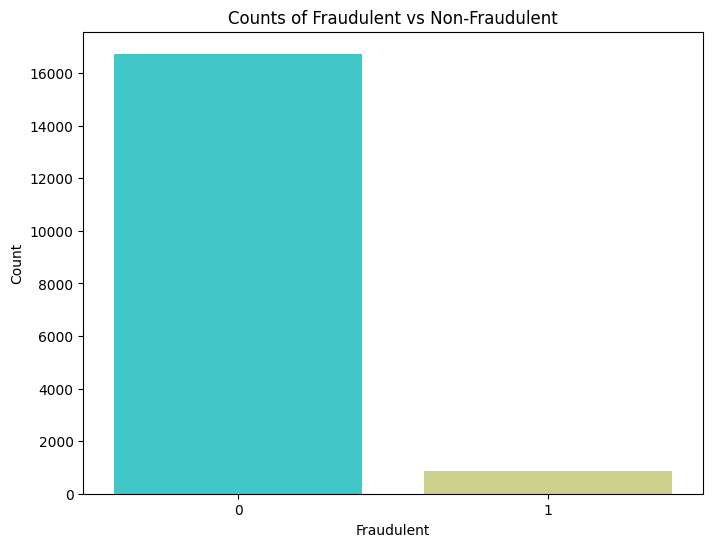

In [24]:
fraudulent_counts = df['fraudulent'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values, palette='rainbow')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Counts of Fraudulent vs Non-Fraudulent')
plt.show()

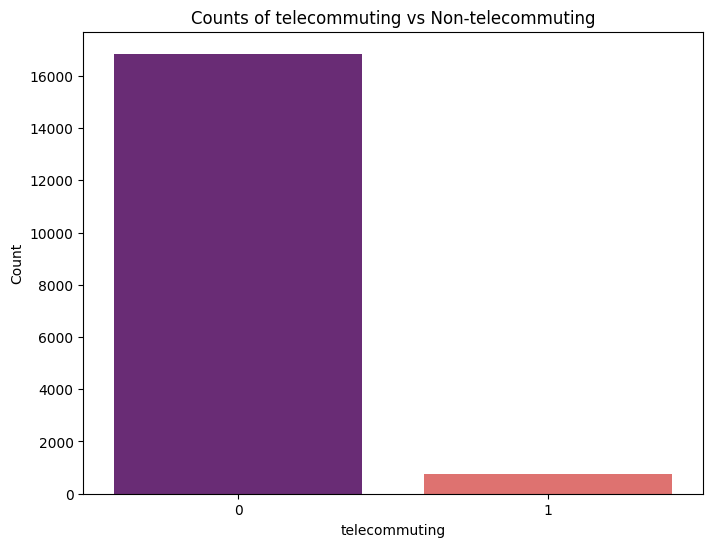

In [25]:
telecommuting_counts = df['telecommuting'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=telecommuting_counts.index, y=telecommuting_counts.values, palette='magma')
plt.xlabel('telecommuting')
plt.ylabel('Count')
plt.title('Counts of telecommuting vs Non-telecommuting')
plt.show()

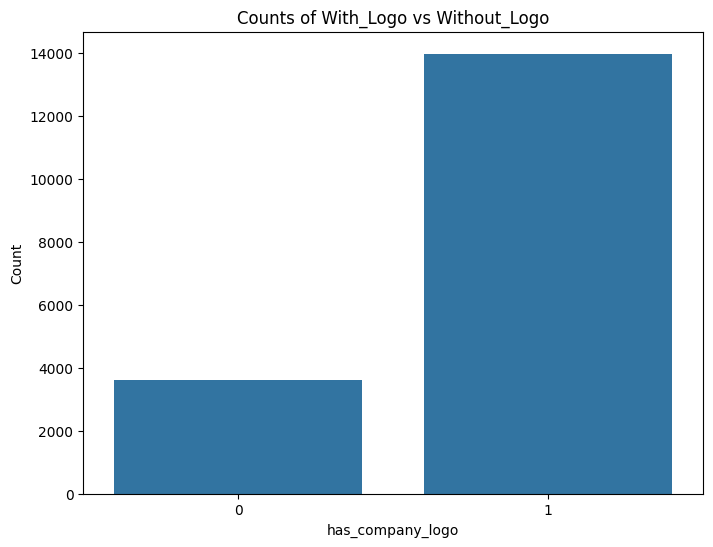

In [26]:
has_company_logo_counts = df['has_company_logo'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=has_company_logo_counts.index, y=has_company_logo_counts.values)
plt.xlabel('has_company_logo')
plt.ylabel('Count')
plt.title('Counts of With_Logo vs Without_Logo')
plt.show()

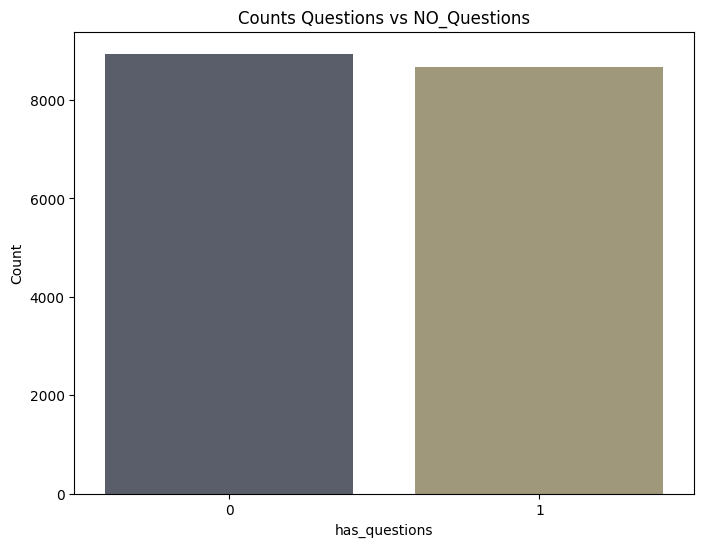

In [27]:
has_questions_counts = df['has_questions'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=has_questions_counts.index, y=has_questions_counts.values, palette='cividis')
plt.xlabel('has_questions')
plt.ylabel('Count')
plt.title('Counts Questions vs NO_Questions')
plt.show()

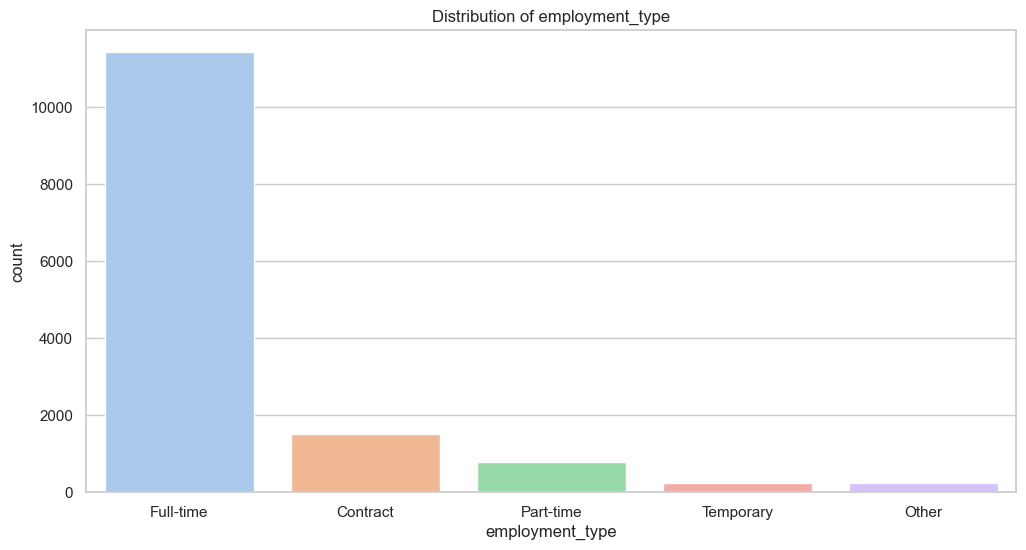

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='employment_type', data=df, palette="pastel", order=df['employment_type'].value_counts().index)

plt.title('Distribution of employment_type')

plt.show()

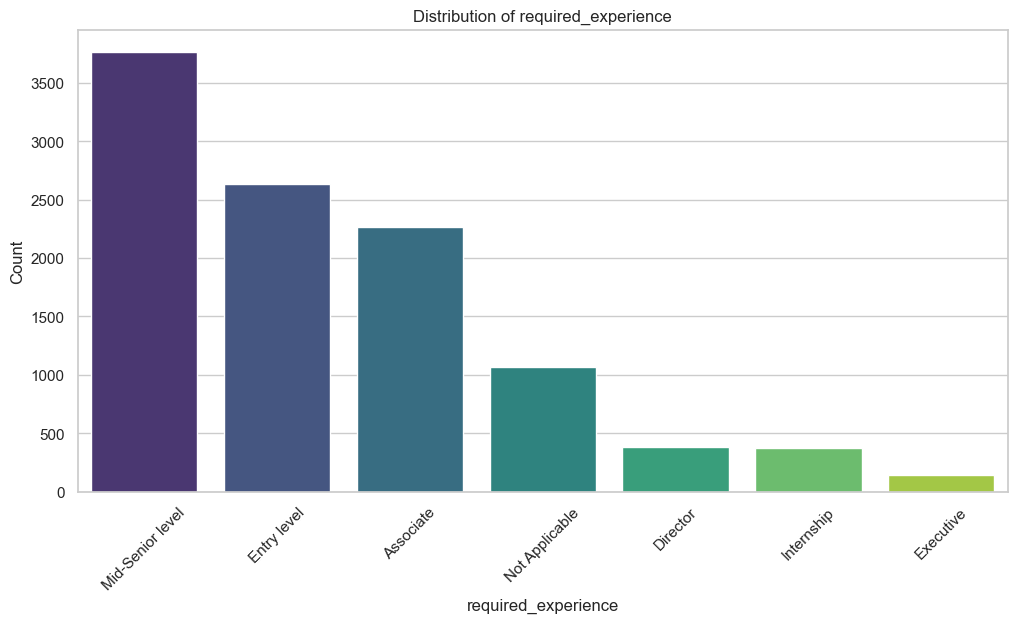

In [29]:
required_experience_counts = df['required_experience'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=required_experience_counts.index, y=required_experience_counts.values, palette='viridis')
plt.xlabel('required_experience')
plt.ylabel('Count')
plt.title('Distribution of required_experience')
plt.xticks(rotation=45)
plt.show()

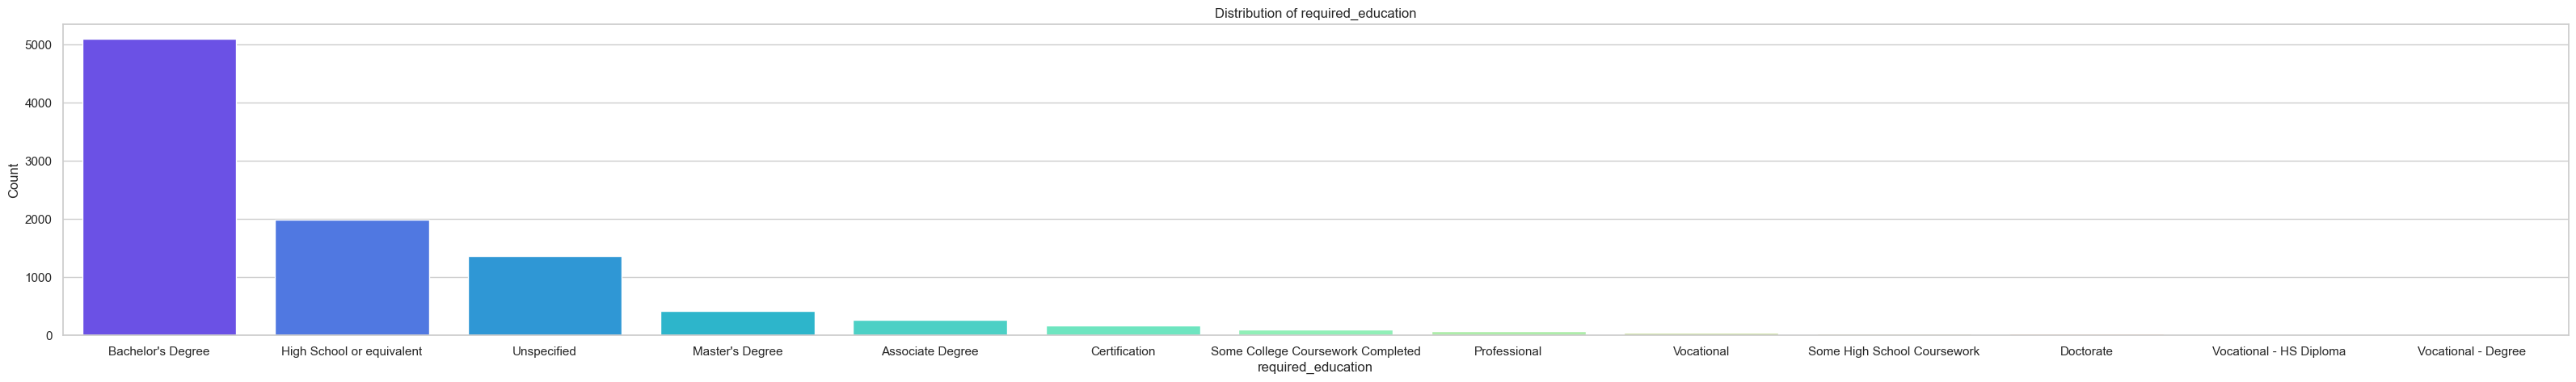

In [30]:
required_education_counts = df['required_education'].value_counts()

plt.figure(figsize=(40, 5))
sns.barplot(x=required_education_counts.index, y=required_education_counts.values, palette='rainbow')
plt.xlabel('required_education')
plt.ylabel('Count')
plt.title('Distribution of required_education')
plt.show()

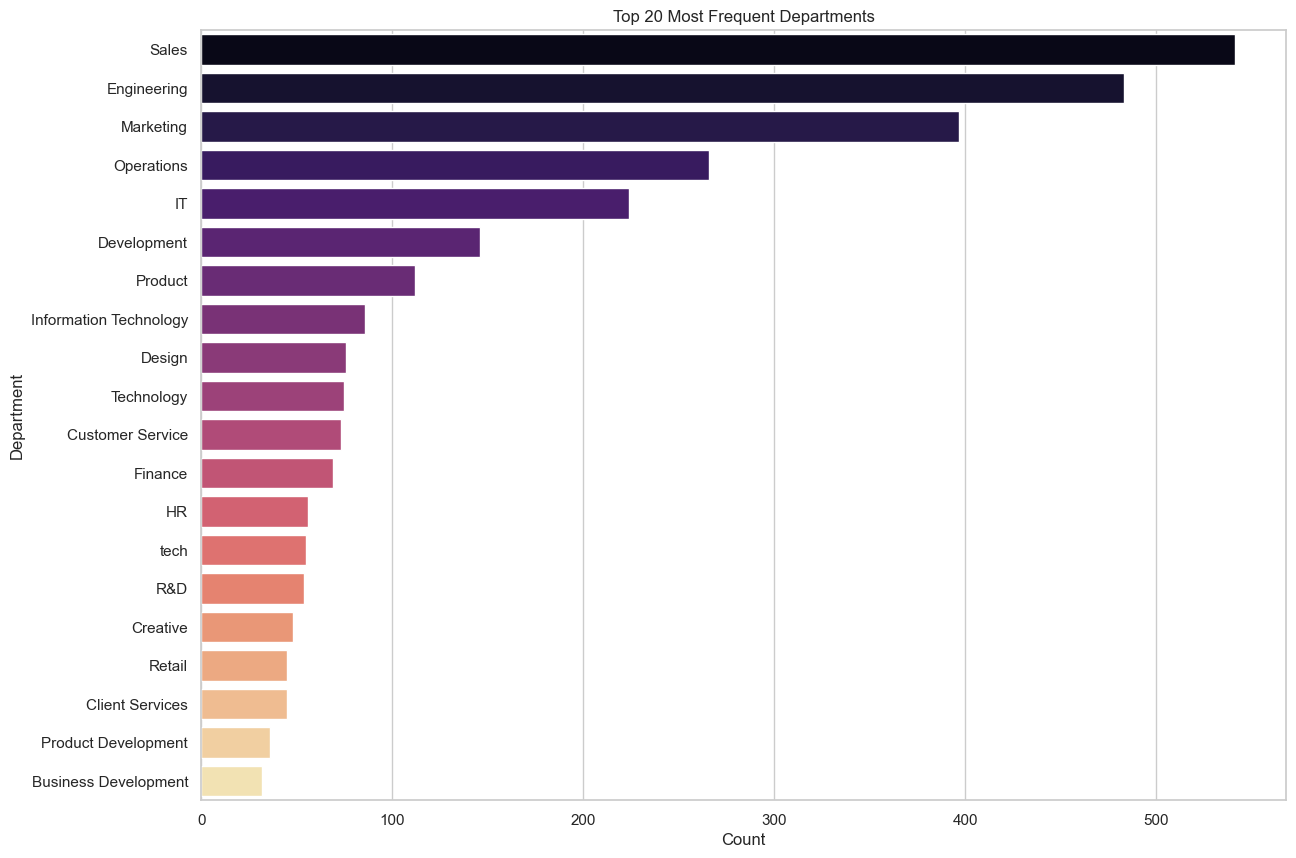

In [31]:
department_counts = df['department'].value_counts()

top_20_departments = department_counts.head(20)

plt.figure(figsize=(14, 10)) 
sns.barplot(y=top_20_departments.index, x=top_20_departments.values, palette='magma')
plt.ylabel('Department')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Departments')
plt.show()

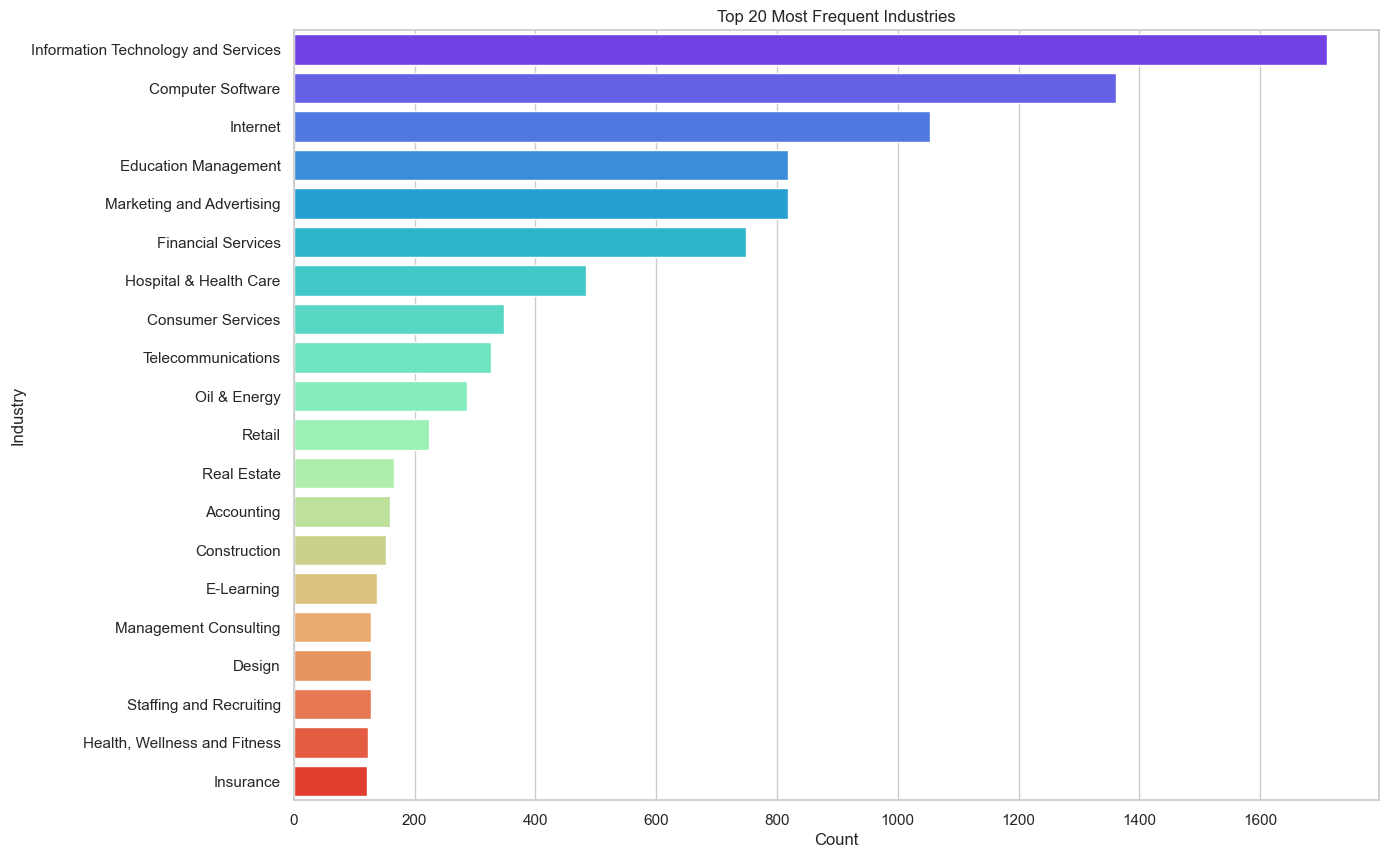

In [32]:
industry_counts = df['industry'].value_counts()

top_20_industry = industry_counts.head(20)

plt.figure(figsize=(14, 10)) 
sns.barplot(y=top_20_industry.index, x=top_20_industry.values, palette='rainbow')
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Industries')
plt.show()

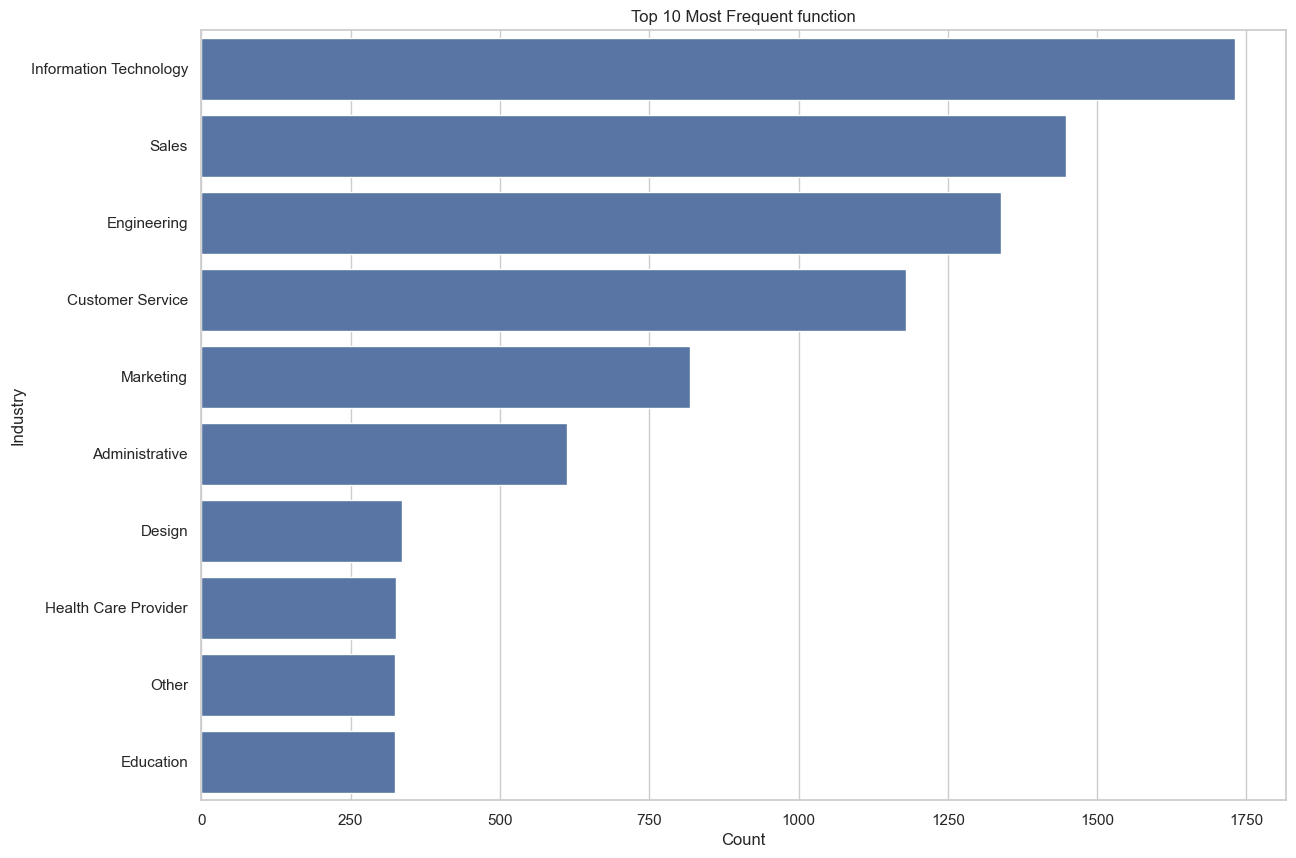

In [33]:
function_counts = df['function'].value_counts()

top_10_function = function_counts.head(10)

plt.figure(figsize=(14, 10)) 
sns.barplot(y=top_10_function.index, x=top_10_function.values)
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent function')
plt.show()

In [34]:
location_split = df['location'].str.split(', ', expand=True)
df['Country'] = location_split[0]
df['City'] = location_split[1]

In [35]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL


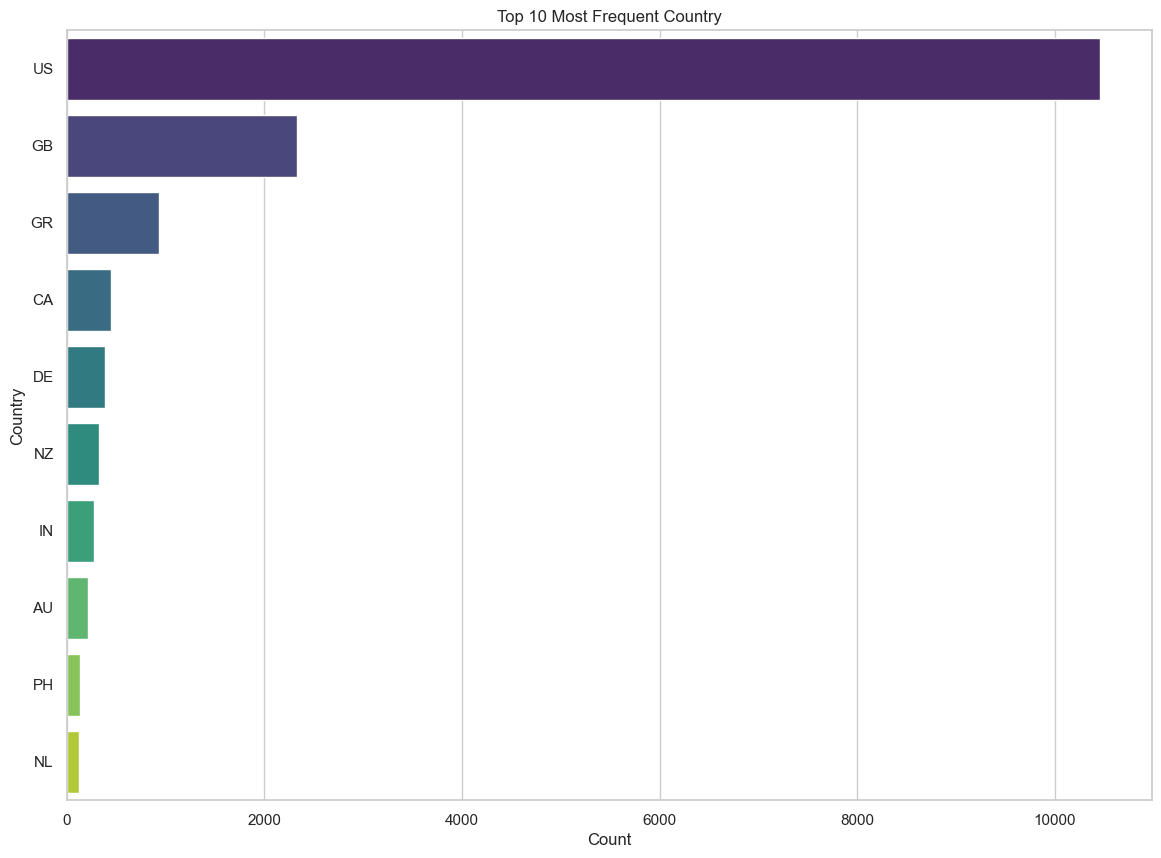

In [36]:
Country_counts = df['Country'].value_counts()

top_10_Country = Country_counts.head(10)

plt.figure(figsize=(14, 10)) 
sns.barplot(y=top_10_Country.index, x=top_10_Country.values, palette='viridis')
plt.ylabel('Country')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Country')
plt.show()

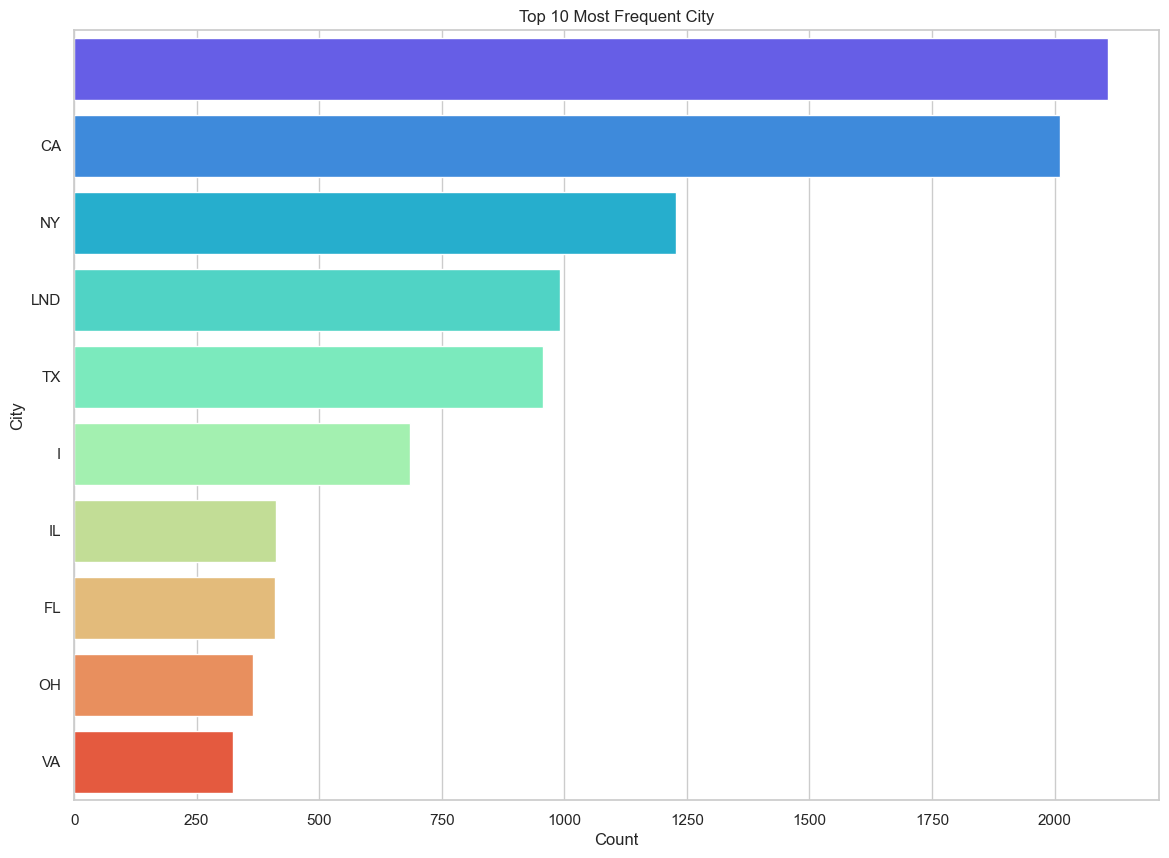

In [37]:
City_counts = df['City'].value_counts()

top_10_City = City_counts.head(10)

plt.figure(figsize=(14, 10)) 
sns.barplot(y=top_10_City.index, x=top_10_City.values, palette='rainbow')
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent City')
plt.show()

In [38]:
df.isnull().sum()

title                      0
location                 341
department             11328
salary_range           14772
company_profile         3282
description                1
requirements            2649
benefits                7108
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3428
required_experience     6962
required_education      8009
industry                4837
function                6363
fraudulent                 0
Country                  341
City                     432
dtype: int64

In [39]:
df.fillna(" ", inplace=True)

In [40]:
df.isnull().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
Country                0
City                   0
dtype: int64

In [41]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,City
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL


Concatenating the needed object Columns for Job Posting in one column

In [42]:
columns_to_concat = ['title', 'location', 'department', 'salary_range', 'company_profile',
'description', 'requirements', 'benefits', 'employment_type',
'required_experience', 'required_education', 'industry', 'function']

df['job_posting'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

new_df = df[['job_posting', 'fraudulent']].copy()

In [43]:
new_df.head(10)

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth Spo...",0
5,"Accounting Clerk US, MD, Job OverviewAp...",0
6,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",0
7,"Lead Guest Service Specialist US, CA, San F...",0
8,"HP BSM SME US, FL, Pensacola Solutions3 is...",0
9,"Customer Service Associate - Part Time US, AZ...",0


In [44]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zaniar.J\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Zaniar.J\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Zaniar.J\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [45]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove digits
    text = re.sub(r'\d', '', text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)
    
    return text

new_df['job_posting'] = new_df['job_posting'].apply(preprocess_text)

In [46]:
new_df.head(10)

,job_posting,fraudulent
0,marketing intern us ny new york marketing food...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0
5,accounting clerk us md job overviewapex enviro...,0
6,head content mf de berlin androidpit founded f...,0
7,lead guest service specialist us ca san franci...,0
8,hp bsm sme us fl pensacola solutions womanowne...,0
9,customer service associate part time us az pho...,0


In [47]:
Fake = new_df[new_df['fraudulent'] == 1]

In [48]:
Fake.head()

,job_posting,fraudulent
98,ice technician us stocton ca oil energy staffi...,1
144,forward cap group raised fund purchase homes s...,1
173,technician instrument controls us power plant ...,1
180,sales executive pk sd karachi sales sales exec...,1
215,ice technician mt poso us ca bakersfield ca mt...,1


In [49]:
Real = new_df[new_df['fraudulent'] == 0]

In [50]:
Real.head()

,job_posting,fraudulent
0,marketing intern us ny new york marketing food...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth spotsourc...,0


In [51]:
text_Real = ' '.join(Real['job_posting'])

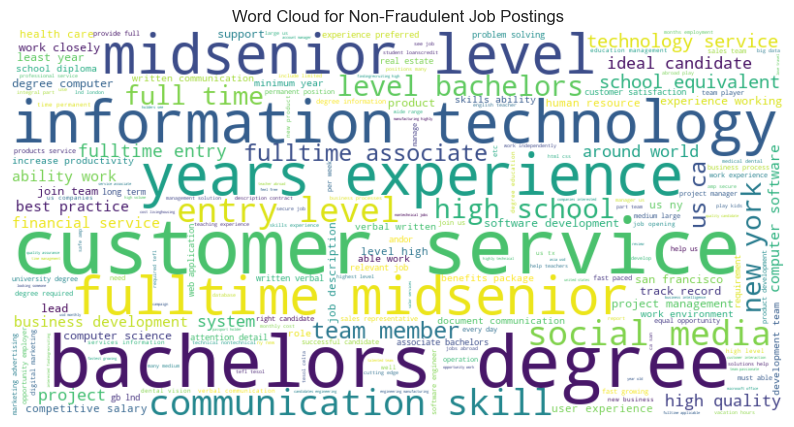

In [67]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_Real)
print(wordcloud)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Fraudulent Job Postings')
plt.show()

In [53]:
text_Fake = ' '.join(Fake['job_posting'])

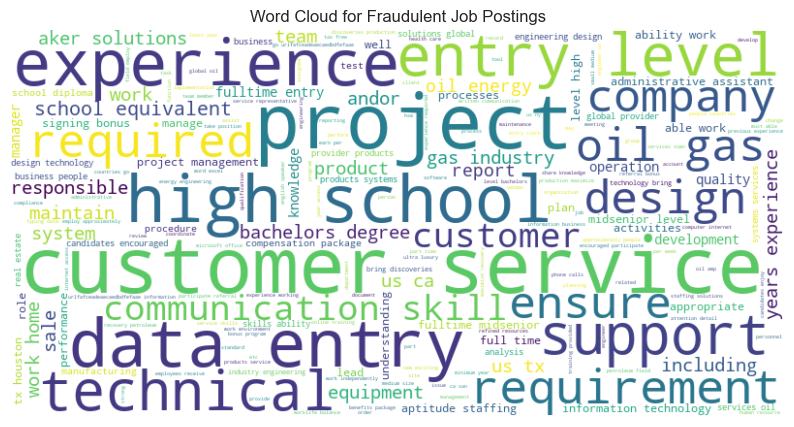

In [54]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_Fake)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fraudulent Job Postings')
plt.show()

In [55]:
new_df['job_posting_tokens'] = new_df['job_posting'].apply(word_tokenize)


new_df['job_posting_sentences'] = new_df['job_posting'].apply(sent_tokenize)

In [56]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...


Part of speech Tagging (POS):
assigns a grammatical category (such as noun, verb, adjective, etc.) to each word in a text corpus.

Benefits
1-Syntactic Analysis: POS tagging helps in understanding the syntactic structure of a sentence by identifying the role of each word. This information is crucial for tasks such as parsing, which involves analyzing the grammatical structure of sentences.

2-Semantic Analysis: POS tags provide valuable cues about the meaning of words in a sentence. For example, knowing whether a word is a noun or a verb can help in disambiguating its meaning in different contexts.

3-Text Understanding: POS tagging aids in extracting meaningful information from text data by identifying key components like nouns, verbs, adjectives, and adverbs. This facilitates tasks such as information retrieval, question answering, and text summarization.

In [57]:
def pos_tagging(sentence):
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

new_df['job_posting_pos_tagged'] = new_df['job_posting_sentences'].apply(lambda x: [pos_tagging(sentence) for sentence in x])

In [58]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_pos_tagged
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[[(marketing, NN), (intern, JJ), (us, PRP), (n..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[[(customer, NN), (service, NN), (cloud, NN), ..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[[(commissioning, VBG), (machinery, NN), (assi..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[[(account, NN), (executive, NN), (washington,..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[[(bill, NN), (review, NN), (manager, NN), (us..."


N-Grams
N-grams are contiguous sequences of n items, typically used in the context of natural language processing (NLP) where the items are words.

Benefits
Feature Representation: In NLP tasks like text classification, sentiment analysis, and machine translation, N-grams can be used as features for training machine learning models. They provide a compact representation of the text data, capturing both local and global patterns.

In [59]:
# def generate_ngrams(tokens, n):
#     return list(ngrams(tokens, n))

# n = 2

# new_df['job_posting_ngrams'] = new_df['job_posting_tokens'].apply(lambda x: generate_ngrams(x, n))

In [60]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_pos_tagged,job_posting_ngrams
0,marketing intern us ny new york marketing food...,0,"[marketing, intern, us, ny, new, york, marketi...",[marketing intern us ny new york marketing foo...,"[[(marketing, NN), (intern, JJ), (us, PRP), (n...","[(marketing, intern), (intern, us), (us, ny), ..."
1,customer service cloud video production nz auc...,0,"[customer, service, cloud, video, production, ...",[customer service cloud video production nz au...,"[[(customer, NN), (service, NN), (cloud, NN), ...","[(customer, service), (service, cloud), (cloud..."
2,commissioning machinery assistant cma us ia we...,0,"[commissioning, machinery, assistant, cma, us,...",[commissioning machinery assistant cma us ia w...,"[[(commissioning, VBG), (machinery, NN), (assi...","[(commissioning, machinery), (machinery, assis..."
3,account executive washington dc us dc washingt...,0,"[account, executive, washington, dc, us, dc, w...",[account executive washington dc us dc washing...,"[[(account, NN), (executive, NN), (washington,...","[(account, executive), (executive, washington)..."
4,bill review manager us fl fort worth spotsourc...,0,"[bill, review, manager, us, fl, fort, worth, s...",[bill review manager us fl fort worth spotsour...,"[[(bill, NN), (review, NN), (manager, NN), (us...","[(bill, review), (review, manager), (manager, ..."


In [61]:
new_df.columns

Index(['job_posting', 'fraudulent', 'job_posting_tokens',
       'job_posting_sentences', 'job_posting_pos_tagged',
       'job_posting_ngrams'],
      dtype='object')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(new_df['job_posting_tokens'], new_df['fraudulent'], test_size=0.2, random_state=42)

In [92]:

test_df = pd.DataFrame(y_train)

test_df.head()

(14079, 1)


,fraudulent
5054,0
10649,0
10262,0
7750,0
17514,0


In [63]:
X_train_flattened = [' '.join(sublist) for sublist in X_train]


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_flattened)

# Flatten the list of lists into a single list of strings for test data
X_test_flattened = [' '.join(sublist) for sublist in X_test]
X_test_vec = vectorizer.transform(X_test_flattened)

In [64]:
# Ensure the shape of X_train_vec matches the number of samples in X_train
print("Shape of X_train_vec:", X_train_vec.shape)
print("Number of samples in X_train:", X_train.shape[0])

# Ensure the shape of X_test_vec matches the number of samples in X_test
print("Shape of X_test_vec:", X_test_vec.shape)
print("Number of samples in X_test:", X_test.shape[0])

Shape of X_train_vec: (14079, 137722)
Number of samples in X_train: 14079
Shape of X_test_vec: (3520, 137722)
Number of samples in X_test: 3520


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_train_vec, y_train, test_size=0.2, random_state=42)

In [82]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 510228 stored elements and shape (2816, 137722)>
  Coords	Values
  (0, 130331)	2
  (0, 5723)	1
  (0, 48577)	1
  (0, 124268)	2
  (0, 26717)	1
  (0, 20950)	1
  (0, 48608)	1
  (0, 64628)	1
  (0, 121760)	3
  (0, 111283)	1
  (0, 36210)	1
  (0, 106050)	1
  (0, 127990)	1
  (0, 30447)	1
  (0, 21346)	1
  (0, 65894)	1
  (0, 53649)	1
  (0, 97244)	1
  (0, 115041)	1
  (0, 59913)	1
  (0, 29054)	1
  (0, 40575)	1
  (0, 79343)	1
  (0, 63740)	1
  (0, 125272)	1
  :	:
  (2815, 127172)	1
  (2815, 107491)	1
  (2815, 56388)	1
  (2815, 116207)	3
  (2815, 70041)	1
  (2815, 119405)	1
  (2815, 48784)	1
  (2815, 87787)	1
  (2815, 36890)	1
  (2815, 79002)	1
  (2815, 72531)	1
  (2815, 93964)	1
  (2815, 83930)	1
  (2815, 110049)	1
  (2815, 70890)	1
  (2815, 67447)	1
  (2815, 24354)	1
  (2815, 18152)	1
  (2815, 13047)	1
  (2815, 101285)	1
  (2815, 69853)	1
  (2815, 37721)	1
  (2815, 100553)	1
  (2815, 44469)	1
  (2815, 122776)	1


In [66]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

joblib.dump(logistic_regression, "model.pkl")

#clf2 = joblib.load("model.pkl")

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9829545454545454
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2692
           1       0.92      0.67      0.78       124

    accuracy                           0.98      2816
   macro avg       0.95      0.83      0.88      2816
weighted avg       0.98      0.98      0.98      2816

Confusion Matrix:
[[2685    7]
 [  41   83]]
